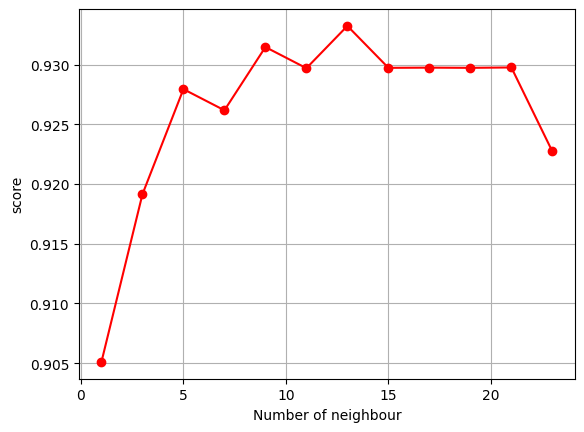

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

data = datasets.load_breast_cancer()
x = data.data
y = data.target
t = int(input("Enter the range of numbers of neighbours "))
score_y = []
k_neih = []
for i in range(1,t,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    cross_score = cross_val_score(clf,x,y).mean()
    score_y.append(cross_score)
    k_neih.append(i)
plt.plot(k_neih,score_y,color='red',marker = "o")
plt.xlabel('Number of neighbour')
plt.ylabel('score')
plt.grid(True)
plt.show()


13


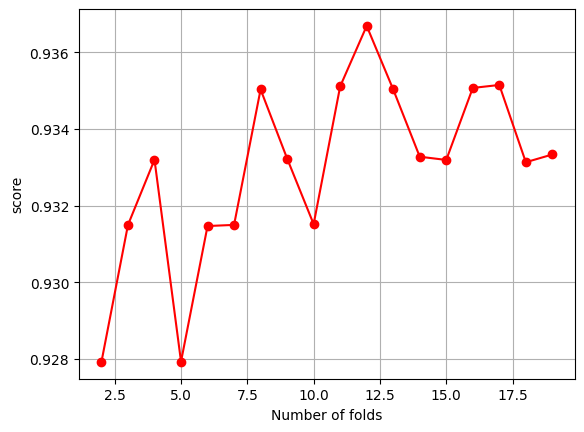

In [2]:
max_k = k_neih[score_y.index(max(score_y))]
print(max_k)
u = int(input("Enter the range of numbers of neighbours "))
score_y1 = []
k_folds = []
for i in range(2,u,1):
    clf = KNeighborsClassifier(n_neighbors=max_k)
    kfold = KFold(n_splits=i, shuffle=True)
    cross_score = cross_val_score(clf,x,y,cv = kfold).mean()
    score_y1.append(cross_score)
    k_folds.append(i)
plt.plot(k_folds,score_y1,color='red',marker = "o")
plt.xlabel('Number of folds')
plt.ylabel('score')
plt.grid(True)
plt.show()

In [3]:
max_folds = k_folds[score_y1.index(max(score_y1))]
max_folds
from sklearn.metrics import classification_report,confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(x,y)
clf = KNeighborsClassifier(n_neighbors=max_k,algorithm='kd_tree')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
con_met = confusion_matrix(y_test,y_pred)
cls_rep = classification_report(y_test,y_pred)
print(cls_rep)
print(con_met)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.93      0.99      0.96        96

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.95      0.94      0.94       143

[[40  7]
 [ 1 95]]


In [9]:
from collections import Counter
#def the pred for single datapoint
def prediction_one(x_train,y_train,x_curr,k):
    distance = []
    for i in range(len(x_train)):
        dist = ((x_train[i,:] - x_curr)**2).sum()
        distance.append([dist,i])
    distance = sorted(distance)
    target = []
    for i in range(k):
        target.append(y_train[distance[i][1]])
    return Counter(target).most_common(1)[0][0]
# defining the KNN manually 
def pred(x_train,y_train,x_test,k):
    y_pred = []
    for x_curr in x_test:
        y_pred.append(prediction_one(x_train,y_train,x_curr,k))
    return y_pred

y_pred2 = pred(x_train,y_train,x_test,13)
confusion_matrix(y_test,y_pred2)


array([[40,  7],
       [ 1, 95]], dtype=int64)